

Fashion MNIST는 다양한 **패션 아이템 이미지**가 포함된 데이터셋입니다.

### 데이터셋 특징

- **학습 데이터**: 6만 개
- **테스트 데이터**: 1만 개
- **이미지 크기**: 28×28 (그레이스케일)
- **클래스**: 총 10개 (각 클래스에 데이터 균등 분포)

### 클래스 정보

0번부터 9번까지 다음과 같은 패션 아이템으로 구성됩니다:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot


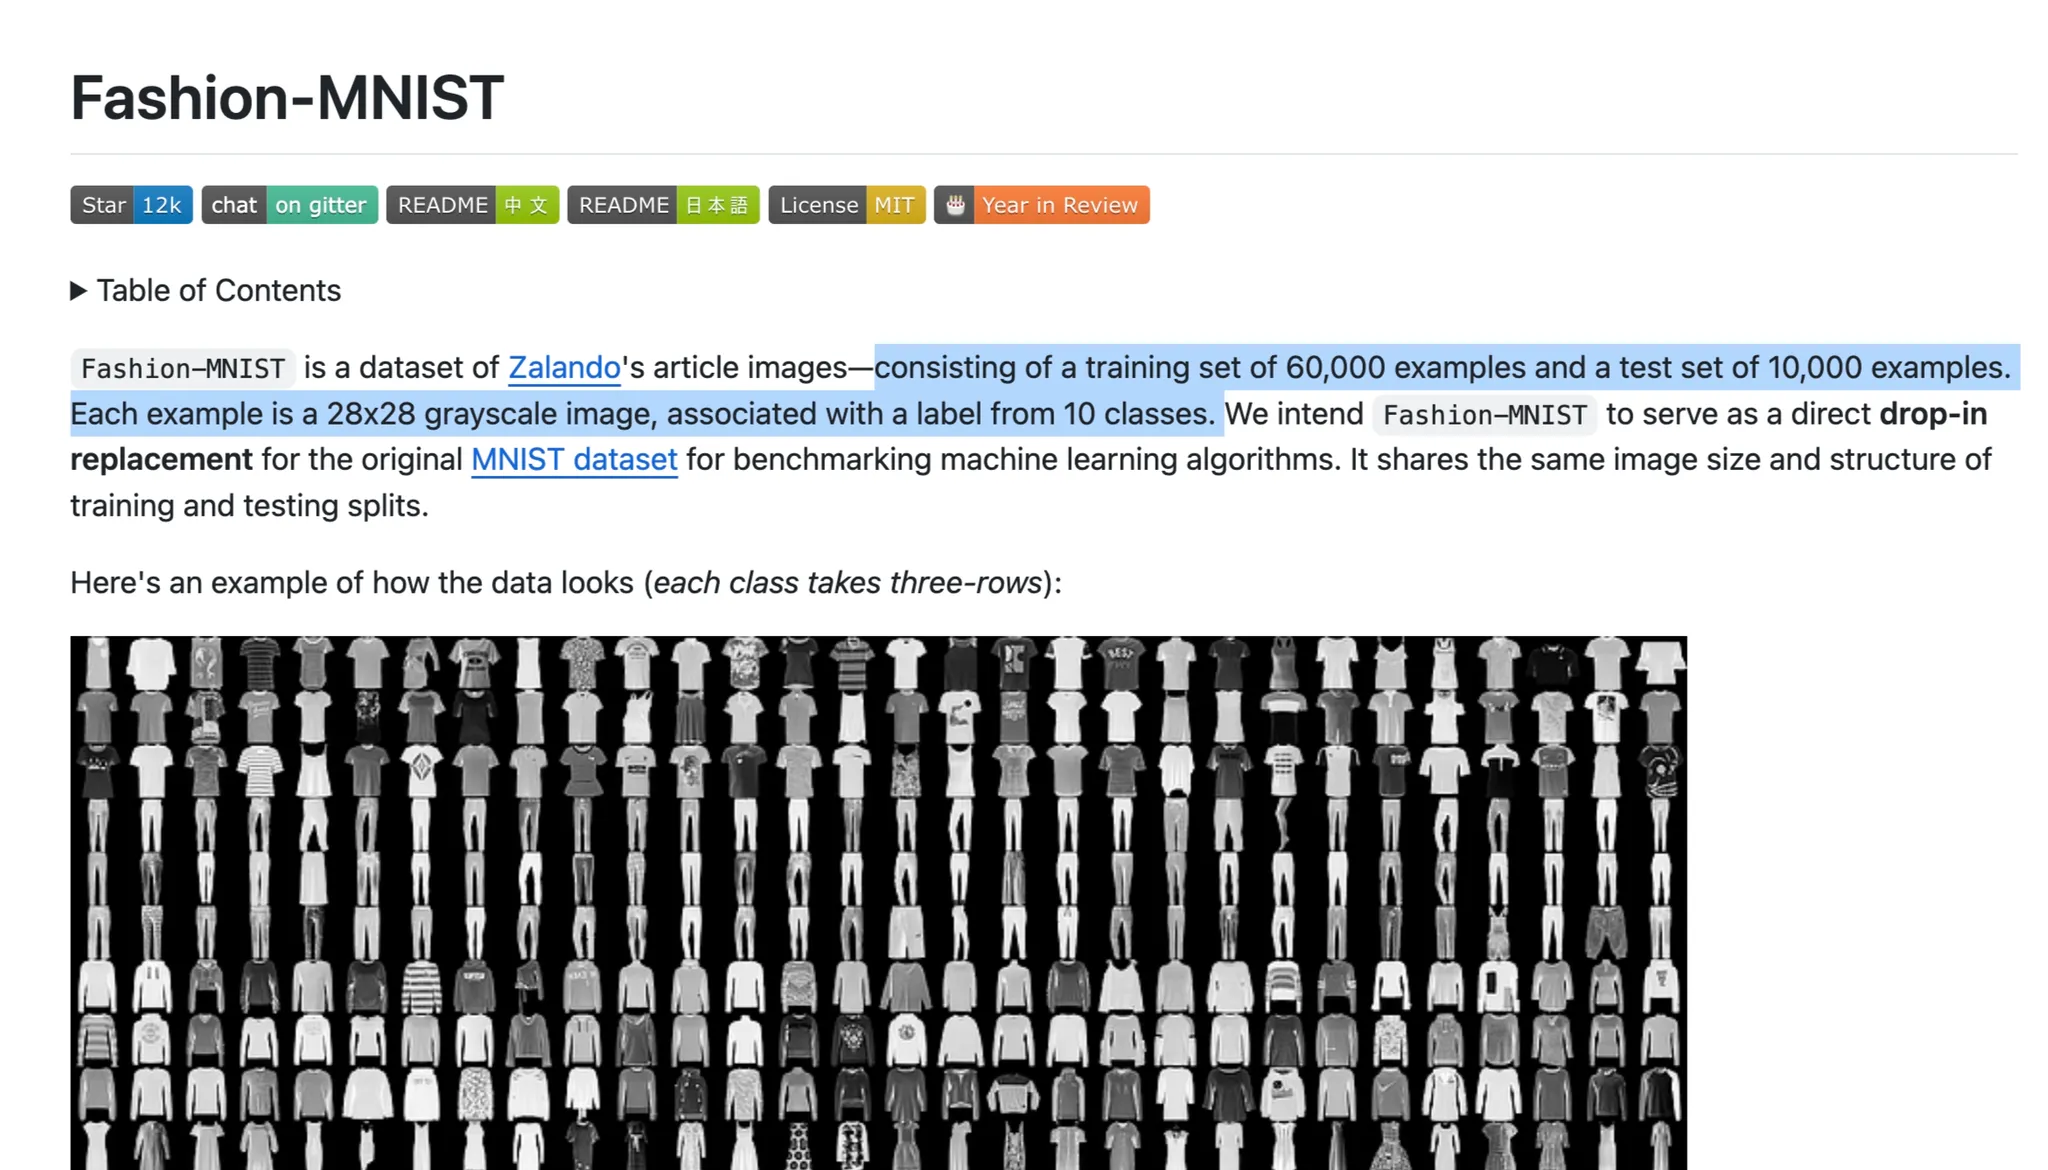

In [74]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import v2

from PIL import Image

import matplotlib.pyplot as plt

from torchinfo import summary


In [3]:
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True
)

100%|██████████| 26.4M/26.4M [01:06<00:00, 399kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 103kB/s]
100%|██████████| 4.42M/4.42M [00:08<00:00, 550kB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.3MB/s]


In [4]:
test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True
)

In [5]:
print(len(train_dataset))
print(len(test_dataset))

60000
10000


In [6]:
train_dataset[1]

(<PIL.Image.Image image mode=L size=28x28>, 0)

In [ ]:

def visualize_data(image, label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  plt.figure(figsize=(1,1))
  plt.imshow(image, cmap='gray')
  plt.xlabel(class_names[label])
  plt.show()

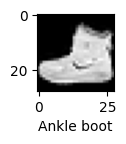

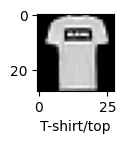

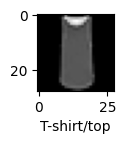

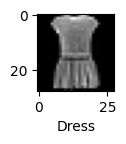

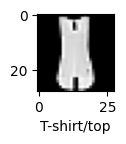

In [8]:
for i in range(5):
  image = train_dataset[i][0]
  label = train_dataset[i][1]
  visualize_data(image,label)

In [ ]:
print(type(image))
to_image = v2.ToImage()
image_tensor = to_image(image)

print(image_tensor.dtype)
print(image_tensor[:10,:10])

<class 'PIL.Image.Image'>
torch.uint8
tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0, 189, 206, 187,  32,   0,   0,
            0,  26, 217, 226, 196,  11,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0, 192, 227, 234, 243, 230, 147,
          239, 242, 234, 218, 209,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0, 173, 225, 215, 233, 254,   0,
          194, 240, 217, 221, 190,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0, 139, 229, 212, 226, 255,   0,
          162, 255, 213, 226, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,  98, 232, 211, 215, 249,  46,
          162, 246, 214, 230, 186,   0,   0,   0,   0,   0,   0,   0,   0,   

In [12]:
to_dtype = to_dtype = v2.ToDtype(dtype=torch.float32, scale=True)
image_tensor_float = to_dtype(image_tensor)

print(image_tensor_float.dtype)
print(image_tensor_float[:10,:10])

torch.float32
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.1020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.7412, 0.8078, 0.7333, 0.1255, 0.0000, 0.0000, 0.0000, 0.1020,
          0.8510, 0.8863, 0.7686, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.7529, 0.8902, 0.9176, 0.9529, 0.9020, 0.5765, 0.9373, 0.9490,
          0.9176, 0.8549, 0.8196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.6784, 0.8824, 0.8431, 0.9137, 0.9961, 0.0000, 0.7608, 0.9412,
          0.8510, 0.8667, 0.7451, 0.0000, 0

In [13]:
transform = v2.Compose([
    v2.ToImage(),
	v2.ToDtype(dtype=torch.float32, scale=True)
])

In [14]:
image_tensor_compose = transform(image)

print(f'type: {type(image_tensor_compose)}')
print(f'dtype: {image_tensor_compose.dtype}')
print(f'max: {image_tensor_compose.max()}')
print(f'min: {image_tensor_compose.min()}')

type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0
min: 0.0


In [15]:
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
    train=False,
    download=True,
    transform=transform
)

In [16]:
image_transform = train_dataset[0][0]

print(f'type: {type(image_transform)}')
print(f'dtype: {image_transform.dtype}')
print(f'max: {image_transform.max()}')
print(f'min: {image_transform.min()}')

type: <class 'torchvision.tv_tensors._image.Image'>
dtype: torch.float32
max: 1.0
min: 0.0


In [21]:
device = torch.device('mps' if torch.mps.is_available() else 'cpu')
print(f'Using device: {device}')
batch_size = 64

Using device: mps


In [22]:
transform = transforms.Compose(
    [
		transforms.ToTensor(),
		transforms.Normalize((0.5,), (0.5,))
	]
)

train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
	download=True,
    transform=transform
)
test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
	download=True,
    transform=transform
)

train_loader = DataLoader(
    train_dataset,
	batch_size=batch_size,
	shuffle=True
)
test_loader = DataLoader(
    test_dataset,
	batch_size=batch_size,
	shuffle=False
)

100%|██████████| 26.4M/26.4M [00:15<00:00, 1.69MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 101kB/s]
100%|██████████| 4.42M/4.42M [00:07<00:00, 569kB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.23MB/s]


In [23]:
class DNNModel(nn.Module):
	def __init__(self):
		super(DNNModel, self).__init__()
		self.fc1 = nn.Linear(28 * 28, 512)
		self.fc2 = nn.Linear(512, 256)
		self.fc3 = nn.Linear(256, 128)
		self.fc4 = nn.Linear(128, 10)
		self.relu = nn.ReLU()

	def forward(self, x):
		x = x.view(x.size(0), -1)  # x.size(0) is the batch size, -1 flattens the rest
		x = self.relu(self.fc1(x))
		x = self.relu(self.fc2(x))
		x = self.relu(self.fc3(x))
		x = self.fc4(x)
		return x
	
model = DNNModel().to(device)

print(model)

DNNModel(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
RL = 0.001
epochs = 30

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr=RL)

def train_model(model, train_loader, loss_fn, opt, epochs):
	model.train()
	for epoch in range(epochs):
		train_loss = 0.0
		correct = 0
		total = 0
		for inputs, labels in train_loader:
			inputs, labels = inputs.to(device), labels.to(device)

			opt.zero_grad()
			outputs = model(inputs)

			loss = loss_fn(outputs, labels)
			loss.backward()

			opt.step()

			train_loss += loss.item() * inputs.size(0)
			_, predicted = torch.max(outputs, 1)
			correct += (predicted == labels).sum().item()
			total += labels.size(0)
		train_loss /= total
		accuracy = 100 * correct / total
		print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}, Accuracy: {accuracy:.2f}%')
train_model(model, train_loader, loss_fn, opt, epochs)

Epoch [1/30], Loss: 0.2735, Accuracy: 89.82%
Epoch [2/30], Loss: 0.2568, Accuracy: 90.34%
Epoch [3/30], Loss: 0.2420, Accuracy: 91.00%
Epoch [4/30], Loss: 0.2329, Accuracy: 91.27%
Epoch [5/30], Loss: 0.2215, Accuracy: 91.81%
Epoch [6/30], Loss: 0.2056, Accuracy: 92.28%
Epoch [7/30], Loss: 0.1983, Accuracy: 92.47%
Epoch [8/30], Loss: 0.1881, Accuracy: 92.79%
Epoch [9/30], Loss: 0.1814, Accuracy: 93.19%
Epoch [10/30], Loss: 0.1711, Accuracy: 93.34%
Epoch [11/30], Loss: 0.1646, Accuracy: 93.75%
Epoch [12/30], Loss: 0.1584, Accuracy: 94.04%
Epoch [13/30], Loss: 0.1518, Accuracy: 94.14%
Epoch [14/30], Loss: 0.1453, Accuracy: 94.39%
Epoch [15/30], Loss: 0.1390, Accuracy: 94.68%
Epoch [16/30], Loss: 0.1340, Accuracy: 94.91%
Epoch [17/30], Loss: 0.1257, Accuracy: 95.13%
Epoch [18/30], Loss: 0.1226, Accuracy: 95.16%
Epoch [19/30], Loss: 0.1131, Accuracy: 95.60%
Epoch [20/30], Loss: 0.1138, Accuracy: 95.67%
Epoch [21/30], Loss: 0.1099, Accuracy: 95.75%
Epoch [22/30], Loss: 0.1016, Accuracy: 96.0

In [28]:
# 테스트 함수
def test_model(model, test_loader, loss_fn):
	model.eval()
	test_loss = 0.0
	correct = 0
	total = 0
	with torch.no_grad():
		for inputs, labels in test_loader:
			inputs, labels = inputs.to(device), labels.to(device)
			outputs = model(inputs)
			loss = loss_fn(outputs, labels)

			test_loss += loss.item() * inputs.size(0)
			_, predicted = torch.max(outputs, 1)
			correct += (predicted == labels).sum().item()
			total += labels.size(0)
	test_loss /= total
	accuracy = 100 * correct / total
	print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {accuracy:.2f}%')

test_model(model, test_loader, loss_fn)

Test Loss: 0.5424, Test Accuracy: 89.12%


In [ ]:
len(train_loader), len(test_loader)	

(938, 157)

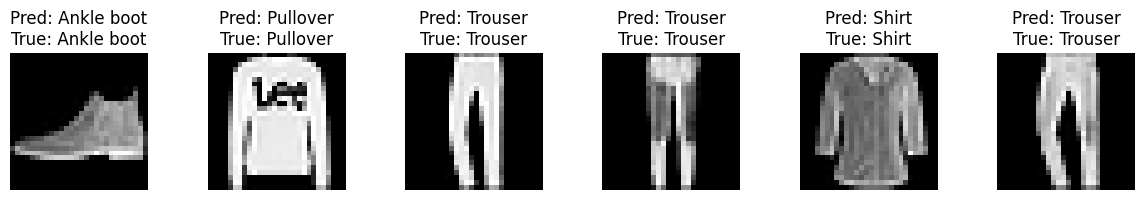

In [34]:
def visualize_predictions(model, test_loader, classes):
	model.eval()
	inputs, labels = next(iter(test_loader))
	inputs, labels = inputs.to(device), labels.to(device)
	
	with torch.no_grad():
		outputs = model(inputs)
		_, preds = torch.max(outputs, 1)
	
	inputs = inputs.cpu()
	preds = preds.cpu()
	labels = labels.cpu()

	fig, axes = plt.subplots(1, 6, figsize=(12, 2))
	for i in range(6):
		axes[i].imshow(inputs[i].squeeze(), cmap='gray')
		axes[i].set_title(f'Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}')
		axes[i].axis('off')
	plt.tight_layout()
	
visualize_predictions(model, test_loader, train_dataset.classes)

데이터 증강은 학습 데이터를 변형하여 데이터 다양성을 높이고, 오버피팅 방지 및 모델 일반화 성능 향상을 목표로 합니다.

### 데이터 증강이란?

- 기존 학습 데이터를 변형하여 **데이터 양을 효과적으로 늘리는 방법**입니다.
- 이미지 데이터의 경우, 이미지 반전, 회전, 자르기, 밝기 조정 등 다양한 방식으로 증강할 수 있습니다.

### 데이터 증강의 효과

- 학습 데이터 다양성을 높여 **오버피팅 방지**.
- 모델의 **일반화 성능** 향상.

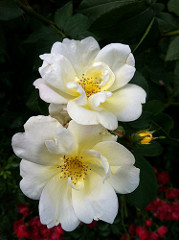

In [40]:
image_flower = Image.open("../data/flower_photos/roses/10090824183_d02c613f10_m.jpg")
image_flower

In [ ]:
def visualize(input_image, transform):
	fig, axes = plt.subplots(2, 2, figsize=(6, 6))
    
	axes = axes.flatten()
	for ax in axes:
		ax.imshow(transform(input_image))
		ax.axis('off')
	plt.tight_layout()
	plt.show()

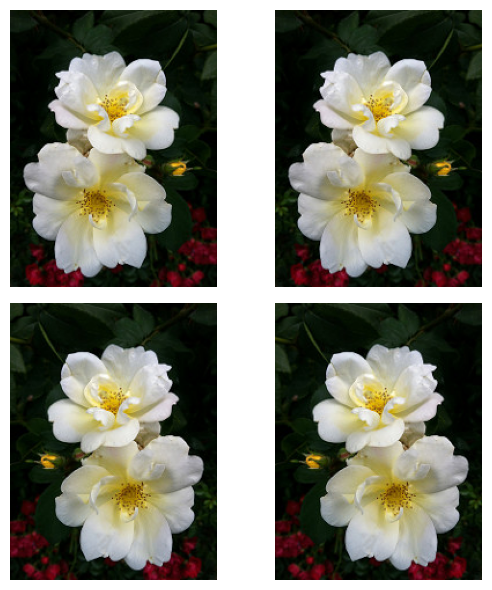

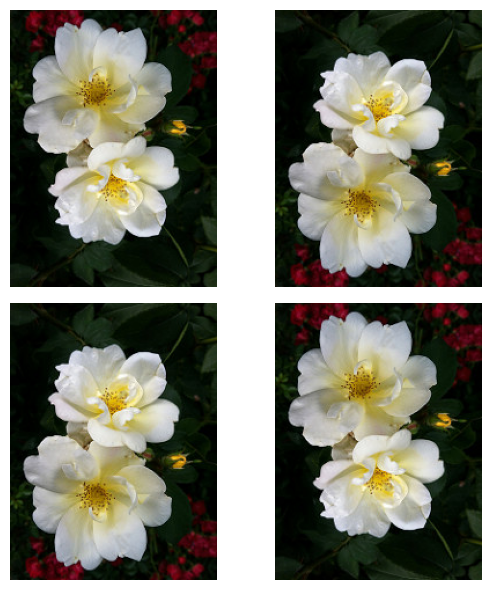

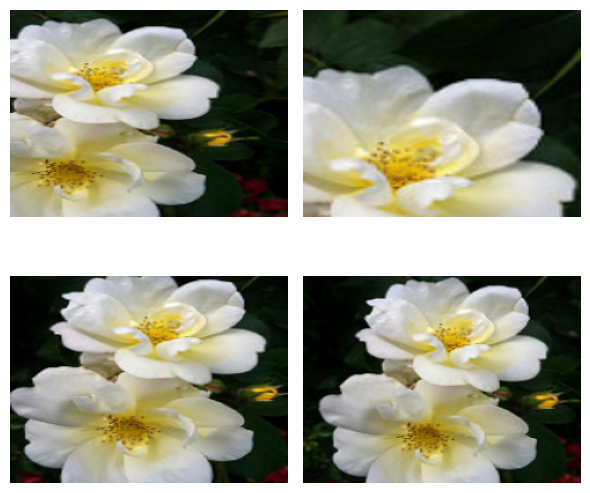

In [45]:
hor_flip = v2.RandomHorizontalFlip(p=0.5) # 수평 뒤집기
visualize(image_flower, hor_flip)

vert_flip = v2.RandomVerticalFlip(p=0.5) # 수직 뒤집기
visualize(image_flower, vert_flip)

rrc = v2.RandomResizedCrop(size=image_flower.size) # 랜덤 크롭
visualize(image_flower, rrc)

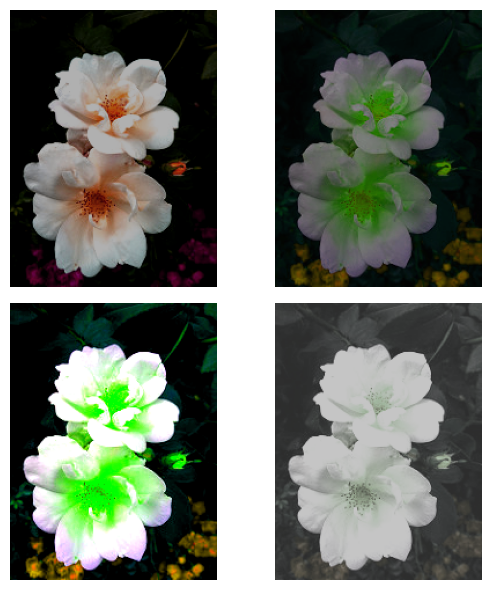

In [50]:
jitter = v2.ColorJitter(brightness=0.5, contrast=0.5, saturation=2, hue=0.2) # 색상 변화
visualize(image_flower, jitter)

In [56]:
transforms_train = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomHorizontalFlip(),
        v2.RandomResizedCrop(size=28),
        v2.RandomRotation(degrees=10),
        v2.ToDtype(dtype=torch.float32, scale=True),
        v2.Normalize(mean=[0.268], std=[0.353]),
	]
)

In [57]:
transforms_test = v2.Compose(
	[
		v2.ToImage(),
		v2.ToDtype(dtype=torch.float32, scale=True),
		v2.Normalize(mean=[0.268], std=[0.353]),
	]
)

In [58]:
train_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
	train=True,
	download=True,
    transform=transforms_train
)

test_dataset = datasets.FashionMNIST(
    root='./fashion_mnist',
	train=False,
	download=True,
    transform=transforms_test
)

In [59]:
len(train_dataset), len(test_dataset)

(60000, 10000)

##### 기본 설정

```python
conv_layer = nn.Conv2d(
    in_channels=3,  # 입력 채널 수 (예: RGB 이미지면 3)
    out_channels=32,  # 출력 채널 수 (필터 개수)
    kernel_size=3,  # 커널 크기 (3x3 필터)
    stride=1,  # 필터 이동 간격
    padding=0,  # 입력 가장자리 패딩 크기
)

```

##### 주요 파라미터

- **`in_channels`**: 입력 데이터의 채널 수.
- **`out_channels`**: 출력 데이터의 채널 수 = 필터 개수.
- **`kernel_size`**: 필터 크기. (정수 → 정사각형, 튜플 → 직사각형 가능)
- **`stride`**: 필터 이동 간격. (기본값: 1)
- **`padding`**: 입력 가장자리를 채워 크기를 조정.
    - 0: 패딩 없음 (`valid`),
    - 1: 출력 크기 = 입력 크기 (`same`은 스트라이드 1에서만 적용 가능).


In [64]:
conv_layer1 = nn.Conv2d(
    in_channels=3, 
	out_channels=32, 
	kernel_size=3, 
	stride=1, 
	padding=1
)
conv_layer2 = nn.Conv2d(
    in_channels=32, 
	out_channels=64, 
	kernel_size=3, 
	stride=1, 
	padding=1
)

x = torch.randn(2, 3, 28, 28)  # 배치 크기 1, 채널 3, 높이 28, 너비 28
x = conv_layer1(x)
y = conv_layer2(x)

print(f'Input shape: {x.shape}')
print(f'Output shape: {y.shape}')

Input shape: torch.Size([2, 32, 28, 28])
Output shape: torch.Size([2, 64, 28, 28])


풀링 레이어는 데이터를 **다운샘플링**하여 크기를 줄이고, 중요한 정보를 추출합니다.

주요 방식:

- **맥스 풀링(Max Pooling)**: 윈도우 내 최댓값 선택.
- **애버리지 풀링(Average Pooling)**: 윈도우 내 평균값 선택.

In [65]:
maxpool_layer = nn.MaxPool2d(
    kernel_size=2, 
    stride=2,
    padding=0
)

In [66]:
x = torch.randn(2, 3, 28, 28)
y = maxpool_layer(x)

print(f'Input shape: {x.shape}')
print(f'Output shape: {y.shape}')

Input shape: torch.Size([2, 3, 28, 28])
Output shape: torch.Size([2, 3, 14, 14])


In [69]:
y = F.max_pool2d(x, kernel_size=2, stride=2)
print(f'Output shape: {y.shape}')

Output shape: torch.Size([2, 3, 14, 14])


In [70]:
avgpool_layer = nn.AvgPool2d(
	kernel_size=2, 
	stride=2,
	padding=0
)

In [71]:
x = torch.randn(2, 3, 28, 28)
y = avgpool_layer(x)
print(f'Output shape: {y.shape}')

Output shape: torch.Size([2, 3, 14, 14])


In [75]:
class CNNModel(nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
		self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
		self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
		self.flatten = nn.Flatten()
		self.linear1 = nn.Linear(64 * 7 * 7, 64)
		self.linear2 = nn.Linear(64, 10)

	def forward(self, x):
		x = F.relu(self.conv1(x))   # 첫 번째 컨볼루션 + 활성화 함수  1x28x28 -> 32x28x28
		x = self.maxpool(x)			# 다운 샘플링				  32x28x28 -> 32x14x14
		x = F.relu(self.conv2(x))	# 두 번째 컨볼루션 + 활성화 함수  32x14x14 -> 64x14x14
		x = self.maxpool(x)			# 다운 샘플링				  64x14x14 -> 64x7x7
		x = self.flatten(x)			# 피처맵을 벡터로 전환   		64x7x7 -> (64*7*7)벡터
		
		x = F.relu(self.linear1(x)) # 첫 번째 선형 계층 + 활성화 함수 (64*7*7) -> (64)벡터
		output = self.linear2(x)	# output 선형 계층            (64) -> (10) 벡터
		return output

cnn_model = CNNModel().to(device)
x = torch.randn(2, 1, 28, 28).to(device)  # 배치 크기 2, 채널 1, 높이 28, 너비 28
output = cnn_model(x)
print(f'Input shape: {x.shape}')
print(f'Output shape: {output.shape}')

Input shape: torch.Size([2, 1, 28, 28])
Output shape: torch.Size([2, 10])


In [76]:
summary(cnn_model, input_size=(32, 1, 28, 28), device=device.type)

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [32, 10]                  --
├─Conv2d: 1-1                            [32, 32, 28, 28]          320
├─MaxPool2d: 1-2                         [32, 32, 14, 14]          --
├─Conv2d: 1-3                            [32, 64, 14, 14]          18,496
├─MaxPool2d: 1-4                         [32, 64, 7, 7]            --
├─Flatten: 1-5                           [32, 3136]                --
├─Linear: 1-6                            [32, 64]                  200,768
├─Linear: 1-7                            [32, 10]                  650
Total params: 220,234
Trainable params: 220,234
Non-trainable params: 0
Total mult-adds (M): 130.48
Input size (MB): 0.10
Forward/backward pass size (MB): 9.65
Params size (MB): 0.88
Estimated Total Size (MB): 10.63